# <u> K-means Clustering from Stratch on 2D points </u>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.stats import multivariate_normal

### Generating the data

X1 shape:  (500, 2)


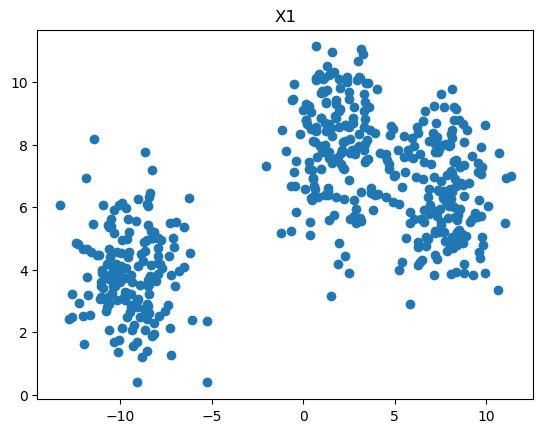

X2 shape:  (500, 2)


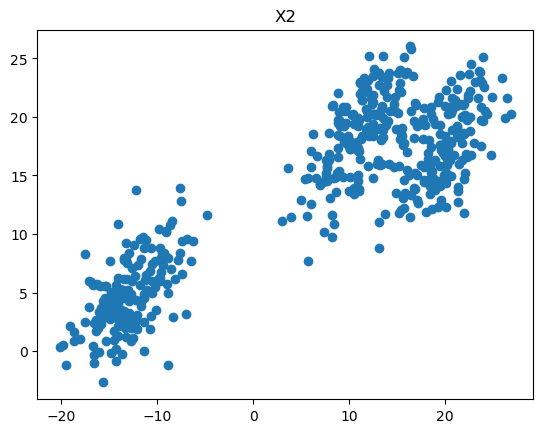

X3 shape:  (500, 2)


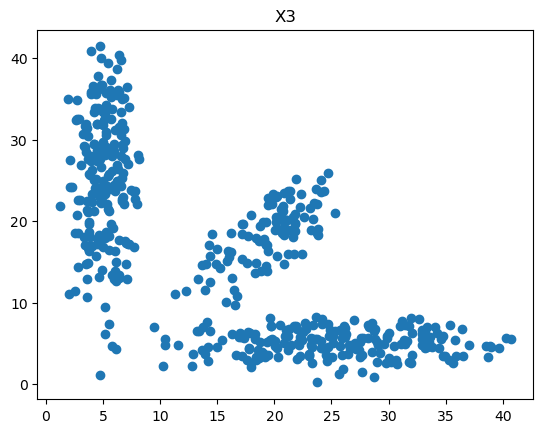

In [2]:
X,Y = make_blobs(cluster_std=1.5,random_state=20,n_samples=500,centers=3)
X1 = np.dot(X,np.random.RandomState(0).randn(2,2))

print('X1 shape: ', X1.shape)

plt.scatter([x[0] for x in X], [x[1] for x in X])
plt.title('X1')
plt.show()

centers = [[4, 7], [9, 9], [9, 2]]

X2,Y2 = make_blobs(cluster_std=1.5,random_state=20,n_samples=500,centers=centers)
X2 = np.dot(X1,np.random.RandomState(0).randn(2,2))

print('X2 shape: ', X2.shape)

plt.scatter([x[0] for x in X1], [x[1] for x in X1])
plt.title('X2')
plt.show()

centers = [[5, 5]]
X31,Y31 = make_blobs(cluster_std=1.5,random_state=20,n_samples=200,centers=centers)
X31 = np.dot(X31, np.array([[1.0, 0], [0, 5.0]]))

centers = [[5, 5]]
X32,Y32 = make_blobs(cluster_std=1.5,random_state=20,n_samples=200,centers=centers)
X32 = np.dot(X32, np.array([[5.0, 0], [0, 1.0]]))

centers = [[7, 7]]
X33, Y33 = make_blobs(cluster_std=1.5,random_state=20,n_samples=100,centers=centers)
X33 = np.dot(X33, np.random.RandomState(0).randn(2,2))

X3 = np.vstack((X31, X32, X33))

print('X3 shape: ', X3.shape)

plt.scatter([x[0] for x in X3], [x[1] for x in X3])
plt.title('X3')
plt.show()

### K-Means Algorithm Class

In [3]:
class KmeansModel:
    
    def __init__(self, X, k, max_iters):
        self.X = X
        self.k = k
        self.max_iters = max_iters
        
        self.dim = X.shape[1]
        self.N = X.shape[0]
        
        self.centroids = np.zeros((self.k, self.dim))
        initial_labels = np.zeros((self.N))  
        
        #1.1 initialize centroids
        chosen_indexes = np.random.choice(self.N, self.k, replace = False) # choose k random row indexes from the dataset (0 … N-1) 
        for centroid_index, row_index in enumerate(chosen_indexes): # replace centroids with new data points
            self.centroids[centroid_index] = self.X[row_index]
            
        #1.2 find initial labels using initial centroids
        initial_labels = self.get_labels(self.X, self.centroids)
        
        self.plot_data(initial_labels, 'Data with initial random clusters')

**My Code Explanation:** Method 2 code, which I implemented in this assignment, randomly selects k random rows from the dataset that will serve as the initial centroid data points. So, it starts off by using np.random.choice to pick k unique rows numbers to match the total number of centroids. Then, it loops through the selected row indexes and will note which centroid we are filling, represented as centroid_index, and which data point we selected, represented as row_index. Then, in the loop, it takes the data point at the specified row index and will replace the data point in the centroid_index–which will replace all the zeros in the self.centroids to be filled with values from our dataset. Then, our self.centroids array will now have useful data points to be used in our K-means algorithm.

In [4]:
def get_labels(self, X, centroids):
    labels = []
    for data_point in X:
        euc_distances = [np.sqrt(np.sum((data_point - c) ** 2)) for c in centroids] # calc the euc distance for every point to each centroid
        closest_centroid = np.argmin(euc_distances) # finds index of centroid with smallest distance
        labels.append(closest_centroid)
    return np.array(labels)

KmeansModel.get_labels = get_labels # We define this function to be a method of the KmeansModel class.

**CODE EXPLANATION:** For get_labels method, it takes every data point in the dataset X and then calculates the Euclidean distance of that point to every centroid–which is found by np.sqrt(np.sum((data_point - centroids) ** 2))--which is stored in the array euc_distances. Then, np.argmin is used to find the index of the smallest distance in the array euc_distances. Finally, the shortest_euc_distance is added as part of the labels list and we return the array of labels for all the points.

Here we have a function to plot our data. This function takes in the labels, and colors each point according to its cluster, as defined by the labels we computed above.

In [5]:
def plot_data(self, labels, title):
    fig = plt.figure(figsize=(7,7))
    ax0 = fig.add_subplot(111)
    ax0.scatter(self.X[:,0], self.X[:,1], c=labels)
    ax0.set_title(title)
    
KmeansModel.plot_data = plot_data

In [6]:
def run(self):
    iters = 0
    while True:
        # step 1) assign labels for current centroids
        labels = self.get_labels(self.X, self.centroids)
        
        # step 2) calc new centroids (mean of pts in each cluster)
        old_centroids = self.centroids.copy()
        new_centroids = np.zeros_like(self.centroids)
        
        for cluster_index in range(self.k):
            points_in_cluster = self.X[labels == cluster_index]
            if len(points_in_cluster) > 0:
                new_centroids[cluster_index] = points_in_cluster.mean(axis=0) 
            else:
                new_centroids[cluster_index] = old_centroids[cluster_index]

        # step 3) stop if converged or max iters
        centroid_change = np.linalg.norm(new_centroids - old_centroids)
        self.centroids = new_centroids
        iters += 1
        if centroid_change == 0 or iters >= self.max_iters:
            break

    final_labels = self.get_labels(self.X, self.centroids) 
    self.plot_data(final_labels, 'Final clusters')
    
KmeansModel.run = run

**CODE EXPLANATION:** This run function will be the iterative loop to run the K-means clustering. So, we first assign every data point to their nearest centroid by using the get_lablels method we used earlier–which allows us to have an array of cluster labels. Then, we want to recalculate the new centroids as the mean of all the points according to their cluster. So, we first define what our old_centroids and new_centroids are so we can compare it for convergence. Then, if the cluster has points (if it is greater than 0), we calculate the mean for every point in each cluster using .mean(axis = 0); however, if the cluster is 0, then we keep the old centroid and continue forward. Then, we make sure to update our centroids with the new centroid values as well as increase our iterations counter. Finally, we add the stop mechanisms of (1) checking if it has reached convergence or (2) it has hit maximum iterations that we specified. For convergence, we use “np.linalg.norm” to find the Euclidean distance of change between the old centroids and new centroids position–where if this distance is 0, that means that the old and new centroid position did not change and indicates a point of convergence, allowing us to break our while loop. Additionally, this code can be stopped by hitting the maximum number of iterations. Finally, the final labels computed from the final centroid locations and results will be plotted for visualization. 

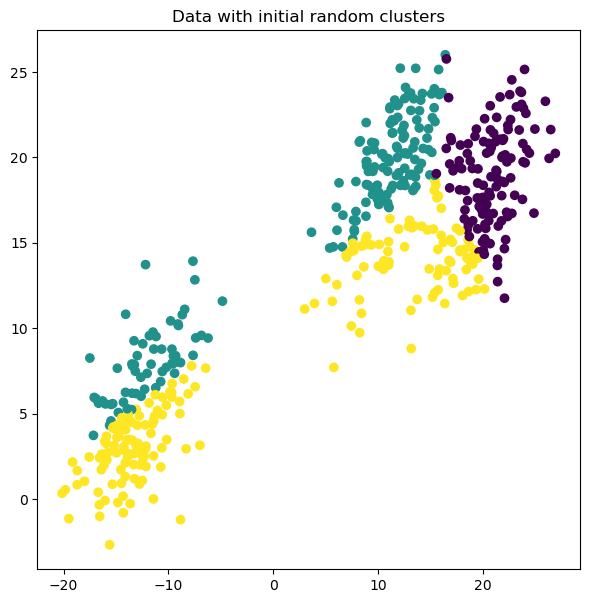

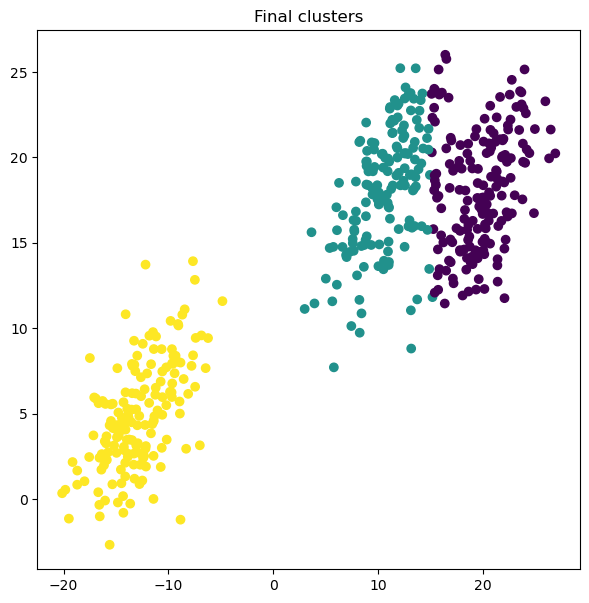

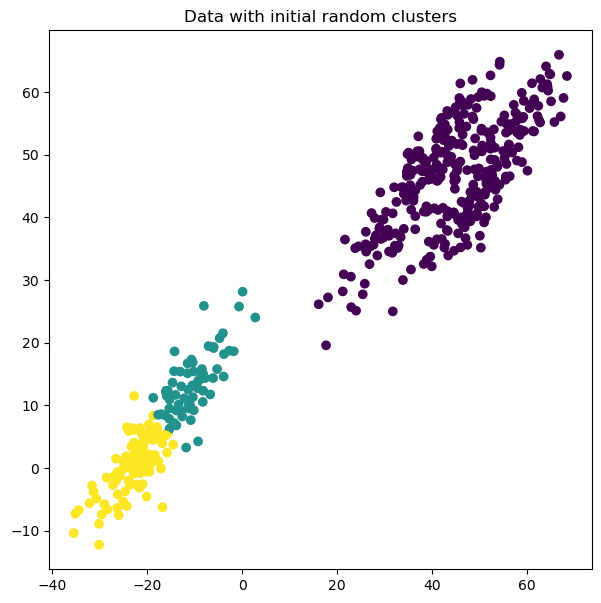

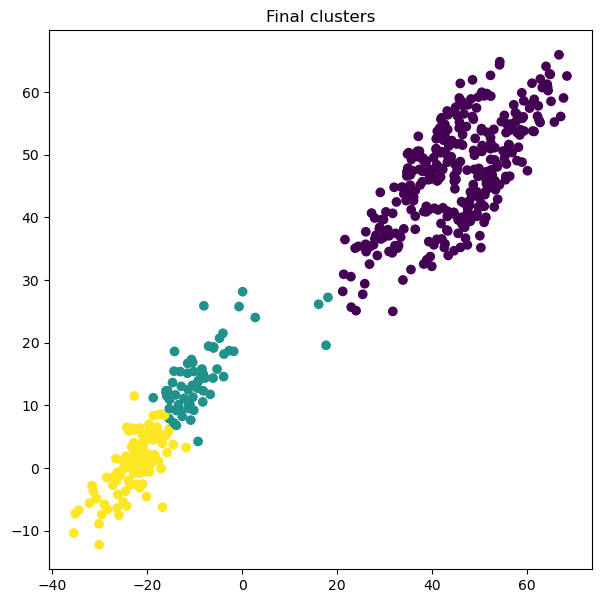

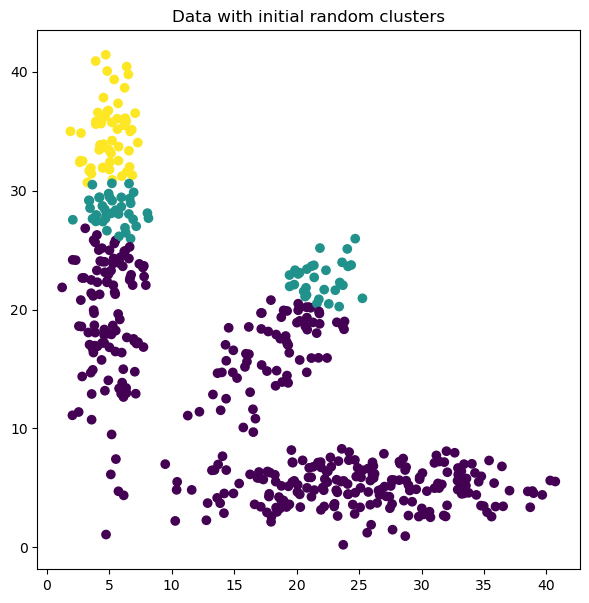

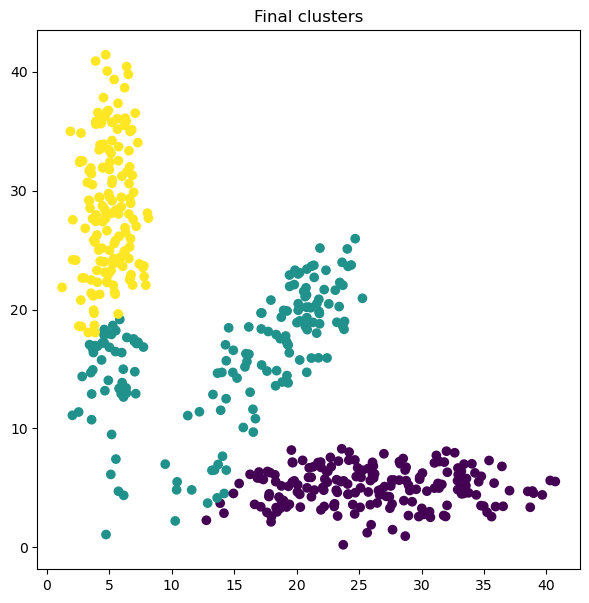

In [7]:
km1 = KmeansModel(X1, 3, 100)
km1.run()

km2 = KmeansModel(X2, 3, 100)
km2.run()

km3 = KmeansModel(X3, 3, 100)
km3.run()